In [1]:
import matplotlib.pyplot as plt
import scipy.constants as cns
import math




In [2]:
#find beta


def findBeta(fBy):
    fB=fBy/(math.sqrt(1+(fBy*fBy)))
    return fB



#Bethe Block from Quantum
def CalcBethQuant(ne,Z,A,m,I,By,M):
    #finding beta
    B=findBeta(By) 
    #For Simplification 
    K=(Kc*Z)/A

    U=(2*m*(By*By))  #Dont Cancel the c^2 with MeV/c^2 (which comes from mass)
    Wmax=(U)/(1+((2*(By/B)*m)/M)+((m/M)**2))
    
    #U=(2*m*By*By*3e+8)/I   #Dont Cancel the c^2 with MeV/c^2 (which comes from mass)
    C=0.5*math.log((U*Wmax)/(I*I))-(B*B)
    #Getting the dedx
    fdedx=K*C*(1/(B*B))
    return fdedx # if density provided MeV*cm^2/g else MeV/cm

#Bethe Block from Classical
def CalcBethClass(ne,Z,A,m,I,By,M):
    #finding beta
    B=findBeta(By)   
      #For Simplification 
    K=(Kc*Z)/A

    U=(2*m*(By*By))  #Dont Cancel the c^2 with MeV/c^2 (which comes from mass)
    Wmax=(U)/(1+((2*(By/B)*m)/M)+((m/M)**2))
    #U=(2*m*By*By*3e+8)/I   #Dont Cancel the c^2 with MeV/c^2 (which comes from mass)
    C=0.5*math.log((U*Wmax)/(I*I))-math.log(B)
    #Getting the dedx
    fdedx=K*C*(1/(B*B))
    
    return fdedx # if density provided MeV*cm^2/g else MeV/cm
###############################################################
#########Some Constants
''' Z = Atomic Numbr 
  ne = Electron density = (Avg*density)/Atomicmass
  B=v/c
  By=p/m
  I= Mean Ionization Energy
  De =4pi*(re)^2*m*c^2
'''

Kc=0.307075 #MeV mol
#Kc=5e-24
Avogadro=cns.Avogadro #atoms/mole
c=3e8 #speed of ligh m/s^2
me=0.5  #Electron's Mass MeV/c^2  
M=938 #Proton's Mass MeV/c^2 
Mu=105 #Muon's Mass MeV/c^2

#for Copper
ICu=322e-6 #MeV
Cu_density=8.96 #g/cm3
Cu_Amass=63.546 #g/mole
Cu_Z=29
ne_Cu=(Avogadro*Cu_Z*Cu_density)/Cu_Amass



#for Lead
IPb=823e-6 #MeV
Pb_density=11.4 #g/cm3
Pb_Amass=207.2 #g/mole
Pb_Z=82
ne_Pb=(Avogadro*Pb_Z*Pb_density)/Pb_Amass


With Quantum Beth-Bloch Formula
 MIP for Copper is 1.45
 MIP for Pb is 1.14
With Classical Beth-Bloch Formula
 MIP for Copper is 1.6
 MIP for Pb is 1.26


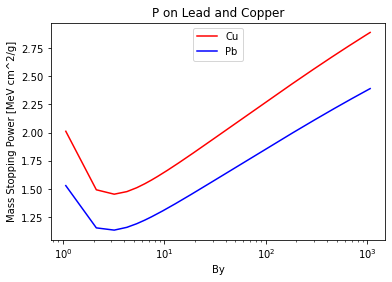

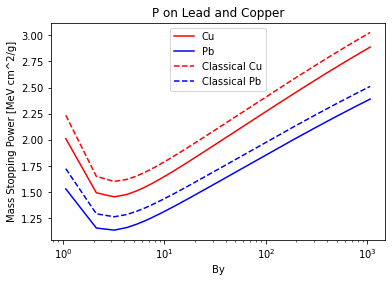

In [3]:
#Homework 2 Part a,c

Betagamma=[]
Pbdepdx=[]
C_Pbdepdx=[]
Cudepdx=[]
C_Cudepdx=[]

for x in range(1,1000):
    
    by=(x/M)*1000
    #Loop on Pb Quantum
    Betagamma.append(by)
    dedx=CalcBethQuant(ne_Pb,Pb_Z,Pb_Amass,me,IPb,by,M)
    Pbdepdx.append(dedx)
    
    #Pb Classical
    dedx=CalcBethClass(ne_Pb,Pb_Z,Pb_Amass,me,IPb,by,M)
    C_Pbdepdx.append(dedx)
    
    #Cu Quantum
    dedx=CalcBethQuant(ne_Cu,Cu_Z,Cu_Amass,me,ICu,by,M)
    Cudepdx.append(dedx)
    
    #Cu Classical
    dedx=CalcBethClass(ne_Cu,Cu_Z,Cu_Amass,me,ICu,by,M)
    C_Cudepdx.append(dedx)

    
print("With Quantum Beth-Bloch Formula")
print(f" MIP for Copper is {round(min(Cudepdx),2)}")
print(f" MIP for Pb is {round(min(Pbdepdx),2)}")
print("With Classical Beth-Bloch Formula")
print(f" MIP for Copper is {round(min(C_Cudepdx),2)}")
print(f" MIP for Pb is {round(min(C_Pbdepdx),2)}")

#Quantum Graphs only
ax=plt.gca()
plt.plot(Betagamma,Cudepdx,'k',label='Cu',color='r')
plt.legend(loc='upper center')
ax.set_xscale('log')
plt.title('P on Lead and Copper')
plt.ylabel('Mass Stopping Power [MeV cm^2/g]')
plt.xlabel('By')       
plt.plot(Betagamma,Pbdepdx,'k',label='Pb',color='blue')
plt.legend(loc='upper center')
plt.show()

#Quantum and Classical Graphs only

ax=plt.gca()
ax.set_xscale('log')
plt.title('P on Lead and Copper')
plt.ylabel('Mass Stopping Power [MeV cm^2/g]')
plt.xlabel('By') 

plt.plot(Betagamma,Cudepdx,'k',label='Cu',color='r')
plt.plot(Betagamma,Pbdepdx,'k',label='Pb',color='blue') 

plt.plot(Betagamma,C_Cudepdx,'k--',label='Classical Cu',color='r')

plt.plot(Betagamma,C_Pbdepdx,'k--',label='Classical Pb',color='blue')
plt.legend(loc='upper center')



For Proton
 MIP for Copper is 13.03
 MIP for Pb is 12.95
For Muon
 MIP for Copper is 13.02
 MIP for Pb is 12.9


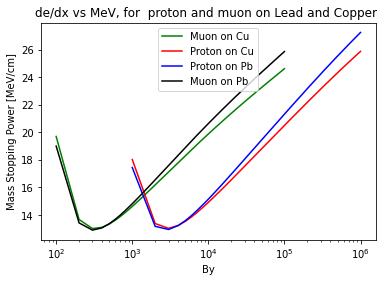

In [24]:
#Homework 2 Part d

ProtonXaxis=[]
MuonXaxis=[]

Pro_Cudepdx=[]
Pro_CudepdxnoDensity=[]

Mu_CudepdxnoDensity=[]
Mu_Cudepdx=[]

Pro_Pbdepdx=[]
Pro_PbdepdxnoDensity=[]
Mu_Pbdepdx=[]
Mu_PbdepdxnoDensity=[]


#For Proton
for x in range(1,1000):
    by=x/M*1000
    p=by*M
    ProtonXaxis.append(p)
    dedx=CalcBethQuant(ne_Pb,Pb_Z,Pb_Amass,me,IPb,by,M)
    Pro_PbdepdxnoDensity.append(dedx)
    Pro_Pbdepdx.append(Pb_density*dedx)
    
    dedx=CalcBethQuant(ne_Cu,Cu_Z,Cu_Amass,me,ICu,by,M)
    Pro_CudepdxnoDensity.append(dedx)
    Pro_Cudepdx.append(Cu_density*dedx)

#For Muon    
for x in range(1,1000):
    by=x/Mu*100
    p=by*Mu
    MuonXaxis.append(p)
    dedx=CalcBethQuant(ne_Pb,Pb_Z,Pb_Amass,me,IPb,by,Mu)
    Mu_PbdepdxnoDensity.append(dedx)


    Mu_Pbdepdx.append(Pb_density*dedx)
    dedx=CalcBethQuant(ne_Cu,Cu_Z,Cu_Amass,me,ICu,by,Mu)
    Mu_CudepdxnoDensity.append(dedx)
    Mu_Cudepdx.append(Cu_density*dedx)

print("For Proton")
print(f" MIP for Copper is {round(min(Pro_Cudepdx),2)}")
print(f" MIP for Pb is {round(min(Pro_Pbdepdx),2)}")
print("For Muon")
print(f" MIP for Copper is {round(min(Mu_Cudepdx),2)}")
print(f" MIP for Pb is {round(min(Mu_Pbdepdx),2)}")

plt.title('de/dx vs MeV, for  proton and muon on Lead and Copper ')
plt.ylabel('Mass Stopping Power [MeV/cm]')
plt.xlabel('By')       

ax=plt.gca()
ax.set_xscale('log')
plt.plot(MuonXaxis,Mu_Cudepdx,'k',label='Muon on Cu',color='g')
plt.plot(ProtonXaxis,Pro_Cudepdx,'k',label='Proton on Cu',color='r')
plt.plot(ProtonXaxis,Pro_Pbdepdx,'k',label='Proton on Pb',color='blue')
plt.plot(MuonXaxis,Mu_Pbdepdx,'k',label='Muon on Pb',color='black') 
plt.legend(loc='upper center')
plt.show()

MIP for Gas Argon is 1.52 Mev cm^2/g
This is for  Question 3
dedx[MeV/cm]= 0.004632783033122518
1.3cm*dedx[MeV]=  0.006 MeV


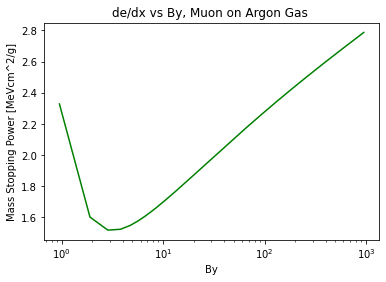

In [64]:

# Homework 3
#for Ar
IAr=187e-6 #MeV
Ar_density=1.662e-3 #g/cm3
Ar_Amass=39.948 #g/mole
Ar_Z=18
ne_Ar=(Avogadro*Ar_Z*Ar_density)/Ar_Amass
Mu_ArdepdxnoDensity=[]
MuonXaxis=[]
Mu_Ardepdx=[]
for x in range(1,1000):
    by=x/Mu*100
    p=by*Mu
    MuonXaxis.append(by)
    dedx=CalcBethQuant(ne_Ar,Ar_Z,Ar_Amass,me,IAr,by,Mu)
    Mu_ArdepdxnoDensity.append(dedx)
    Mu_Ardepdx.append(dedx*Ar_density)


print(f"MIP for Gas Argon is {round(min(Mu_ArdepdxnoDensity),2)} Mev cm^2/g")

ax=plt.gca()
ax.set_xscale('log')
plt.title('de/dx vs By, Muon on Argon Gas ')
plt.ylabel('Mass Stopping Power [MeVcm^2/g]')
plt.xlabel('By')  
plt.plot(MuonXaxis,Mu_ArdepdxnoDensity,'k',label='Muon on Cu',color='g')

dedx=CalcBethQuant(ne_Ar,Ar_Z,Ar_Amass,me,IAr,by,Mu)

result=1.3*Ar_density*dedx

print(f"This is for  Question 3")
print(f"dedx[MeV/cm]= {Ar_density*dedx}")
print(f"1.3cm*dedx[MeV]=  {round(result,4)} MeV") # Answer to Particle energy in MeV)) # Answer to Particle energy in MeV


4.0
39.191835884530846
Dr Jone's way


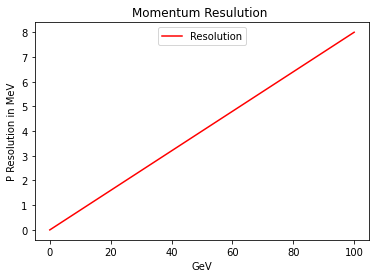

the way I found


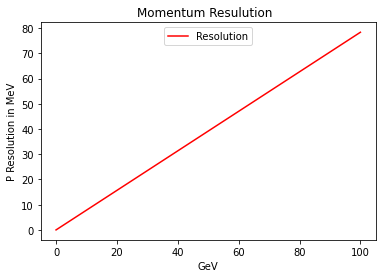

In [37]:
#Homework4
def MomentResDrJones(p,d,pitch):
    res=(p*pitch)/d
    return res
def MomentRes(p,d,pitch):
    top=math.sqrt(3/2)*pitch*8*p
    bottom=d
    res=(top/bottom)
    return res

x1=[]
y1=[]

x2=[]
y2=[]
pitch=200e-6 #m
d=2.5 #m

for p in range(1,100000):
    res=MomentResDrJones(p,d,pitch)
    res2=MomentRes(p,d,pitch)
    if(p==50000):
        print(res)
        print (res2)
    y1.append(res)
    x1.append(p/1000)
    y2.append(res2)
    x2.append(p/1000)
#Dr Jone's Way 
print("Dr Jone's way")
plt.plot(x1,y1,'k',label='Resolution',color='r')
plt.title('Momentum Resulution ')
plt.legend(loc='upper center')
ax.set_yscale('log')
plt.ylabel('P Resolution in MeV')
plt.xlabel('GeV')   
plt.show()

print("the way I found")
#The way I found
plt.plot(x2,y2,'k',label='Resolution',color='r')
plt.title('Momentum Resulution  ')
plt.legend(loc='upper center')
ax.set_yscale('log')
plt.ylabel('P Resolution in MeV')
plt.xlabel('GeV')   
plt.show()